In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [29]:
trial_idx=3
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down this Hamiltonian to understand its structure and identify all the necessary components for the Hartree-Fock implementation.

First, I'll identify the dimension (D) of the system, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals (p_x, p_y, d) and spin s. So we have a 3-orbital, 2-spin system, making D = (2, 3) where the first dimension is for spin (up, down) and the second is for the orbital type (p_x, p_y, d).

Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

### QUESTION 2: Identifying Interacting Terms
Looking at the Hamiltonian, we need to identify what depends on expectation values (`exp_val`):

We have:
1. $n^p$ - The total density of holes on oxygen

In [7]:
print(generated_code['thinking'])

Let's break down this Hamiltonian to understand its structure and identify all the necessary components for the Hartree-Fock implementation.

First, I'll identify the dimension (D) of the system, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we have:

$\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals (p_x, p_y, d) and spin s. So we have a 3-orbital, 2-spin system, making D = (2, 3) where the first dimension is for spin (up, down) and the second is for the orbital type (p_x, p_y, d).

Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

### QUESTION 2: Identifying Interacting Terms
Looking at the Hamiltonian, we need to identify what depends on expectation values (`exp_val`):

We have:
1. $n^p$ - The total density of holes on oxygen sites (from expectation values of p_x and p_y orbita

In [8]:
print(generated_code['text'])

# Analysis of the Emery Model Hamiltonian

## QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

This system has 2 spin flavors and 3 orbital flavors (p_x, p_y, and d). The Hamiltonian matrix has dimensions (2,3,2,3,N_k) before flattening.

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `n_p`: Total density of holes on oxygen sites = Sum of expectation values for p_x and p_y orbitals across both spins
- `n_d`: Total density of holes on d orbitals = Sum of expectation values for d orbital across both spins
- `n`: Total hole density = n_p + n_d
- `eta`: Nematic order parameter = Difference between p_x and p_y occupation

TERMS:
- `\gamma_1(k_i) = -2t_{pd}\cos\frac{k_i}{2}` -> H[s,0,s,2,:] and H[s,2,s,0,:] (p_x-d hopping), H[s,1,s,2,:] and H[s,2,s,1,:] (p_y-d hopping), NI
- `\gamma_2(\kk) = -4t_{pp}\cos\frac{k_x}{2}\cos\frac{k_y}{2}` -> H[s,0,s,1,:] and H[s,1,s,0,:] (p_x-p_y h

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for the Emery model with p_x, p_y, and d orbitals.
    
    This implements a three-orbital model on a square lattice with p-d and p-p hoppings,
    and includes interactions that can lead to nematic ordering.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system (default is 0.5).
    """
    def __init__(self, N_shell: int, parameters: Dict[str, Any] = {}, filling_factor: float = 0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {
            '0': 'spin',     # 0: up, 1: down
            '1': 'orbital'   # 0: p_x, 1: p_y, 2: d
        }
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = paramete

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_3.py


# Code evaluation

In [30]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [31]:
import importlib

In [32]:
module = importlib.import_module(code_path)

In [33]:
import HF

## Task 1: Check k-space

In [34]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

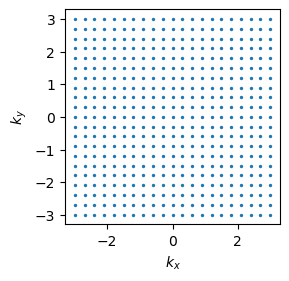

In [35]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [36]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [37]:
h_nonint = ham.generate_non_interacting()

In [38]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

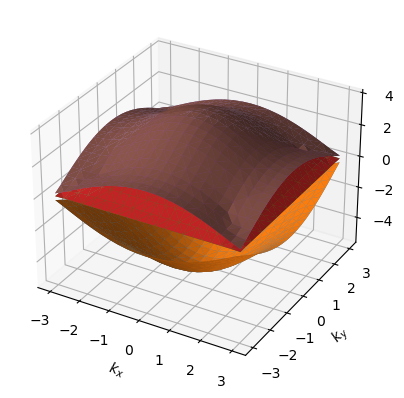

In [39]:
utils_auto.plot_2d_bandstructure(ham,en)

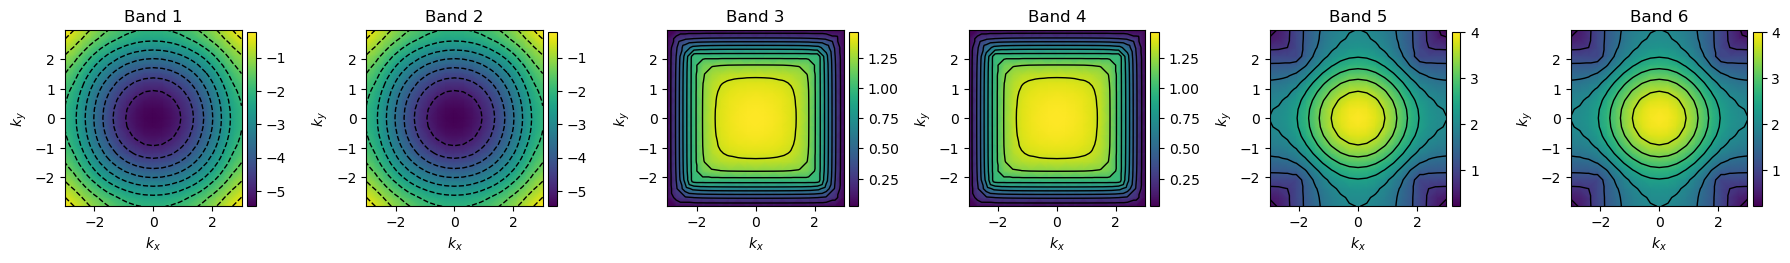

In [40]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [41]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [42]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [43]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 4


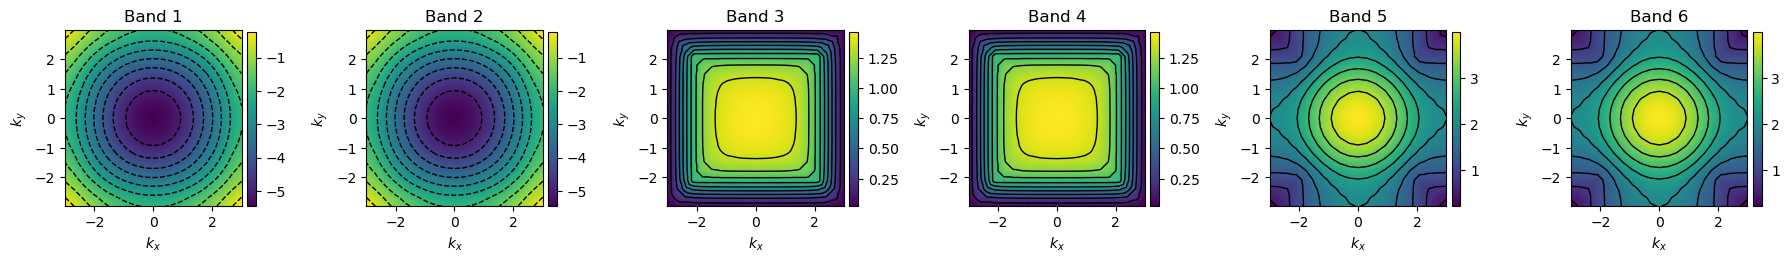

In [44]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [45]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [46]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [47]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 3


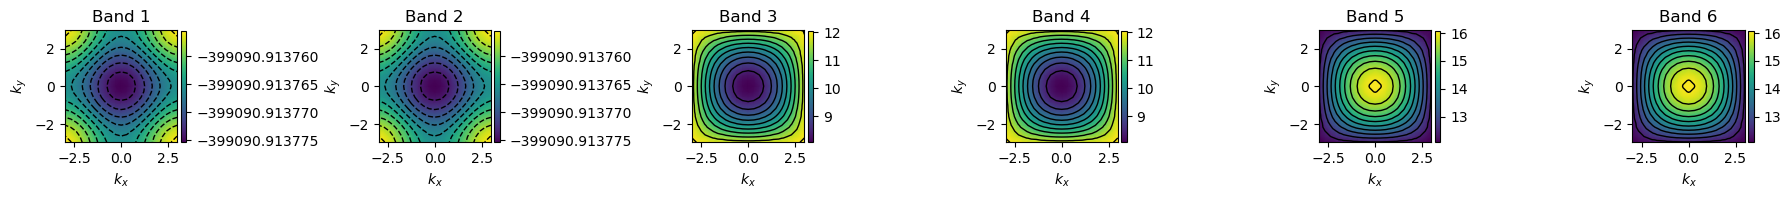

In [48]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [49]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399098.97
U/T is 23734.02
mean_U is 24190.30


# Auto eval

## Task 1

In [50]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze this image based on the provided rubric and problem.

The image shows a 2D plot with axis labels $k_x$ and $k_y$, both ranging from approximately -3 to 3. The plot shows a regular grid of blue dots arranged in a square pattern over this range.

According to the rubric, I need to check:
1. If this image shows the momentum space mesh in the first Brillouin zone of the concerned problem
2. The point group symmetry of the mesh

Let's start by understanding what should be shown in the plot based on the given Hamiltonian.

The Hamiltonian is for a square lattice system, as stated at the end of the problem description. For a square lattice in real space, the first Brillouin zone in momentum space is also a square, typically spanning from $-\pi$ to $\pi$ in both $k_x$ and $k_y$ directions (assuming lattice constant $a=1$).

Looking at the image:
- The plot shows a square region from approximately -3 to 3 in both $k_x$ a

In [51]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [52]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I
I am given an image showing a series of 6 band structure plots (labeled Band 1 through Band 6) for a condensed matter physics problem. Each plot shows the energy dispersion in the first Brillouin zone with false color plots and contour lines. I need to analyze these plots based on the rubric provided and determine if they correctly represent the band structure for the given Hamiltonian of a square lattice system.

Let me go through the rubric points systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, all 6 plots show a square-shaped domain in the k-space, with kx and ky axes ranging from approximately -3 to 3. The Brillouin zone boundary appears to be square-shaped, which is indeed what's expected for a square lattice. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false colo

In [53]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [54]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=5, nu='1/3')
    )


#################### THINKING ####################

I
I need to evaluate if the image provided is showing the correct information for the renormalized band structure in a Hartree-Fock calculation, following the rubric provided. Let me work through this methodically:

### 1. Brillouin Zone Shape
From the image, I can see 6 band plots, each showing a square region in k-space from approximately -3 to 3 (or -2 to 2) in both kx and ky directions. This square shape is consistent with the Brillouin zone of a square lattice, which should indeed be square. So this matches what's expected.

### 2. Symmetry Analysis
Let me analyze the energy distribution in each band:

- **Bands 1 & 2**: These bands have circular contours of energy, with the lowest energy (dark purple) at the center (k=0) and increasing energy (yellow) toward the edges. This shows full rotational symmetry around the Γ point.

- **Bands 3 & 4**: These have square-shaped contours with high energy (yellow) in the center surrounded 

In [55]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [56]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper, nu='1/3',U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me
Let me analyze the image showing the band structure plots for a condensed matter system calculated with the Hartree-Fock method. I need to follow the rubric to evaluate whether this image correctly shows the expected results.

The image shows 6 bands (Band 1 through Band 6), each displayed as a false color plot in the first Brillouin zone. 

Let's go through the rubric step by step:

1. Brillouin zone boundary shape:
Looking at all plots, the Brillouin zone appears to be square-shaped with kx and ky axes ranging from approximately -2.5 to 2.5. This is consistent with a square lattice, which should have a square-shaped first Brillouin zone.

2. Symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- In Bands 1 and 2, the highest energy regions appear to be at the edges of the plot.
- In Bands 3 and 4, the highest energy regions (yellow) are at the corners of the Brillouin zone.
- In Bands 5 and 6, the highe

In [57]:
answer4=utils_auto.extract_result_content(result4['text'])

In [58]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
